<a href="https://colab.research.google.com/github/EduarBecerra/Extracci-n-de-datos/blob/main/Regrasi%C3%B3n_Lineal_Pretest_TP_STEMK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#intalamos libreria para análisis de variables categoricas
%pip install funpymodeling

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [7]:
#carga de un archivo excel
Pretest= pd.read_excel("PRETEST - TP-STEMK.xlsx")
Pretest

,TPSK,TPMK,TPEK,iSTEM,PET
0,4.00,3.8,3.50,3.50,2.50
1,6.25,5.8,6.00,5.00,6.00
2,4.00,3.2,6.25,4.50,5.25
3,1.00,1.0,1.00,1.00,1.00
4,6.00,5.8,5.50,6.00,3.25
5,1.00,1.0,1.00,1.00,1.00
6,5.25,4.4,4.50,5.00,4.00
7,5.00,2.4,4.00,4.00,2.00
8,4.00,4.0,5.00,3.75,4.00
9,5.25,5.8,5.75,2.50,2.00


In [8]:
#Verificamos información del DataFrame
Pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPSK    13 non-null     float64
 1   TPMK    13 non-null     float64
 2   TPEK    13 non-null     float64
 3   iSTEM   13 non-null     float64
 4   PET     13 non-null     float64
dtypes: float64(5)
memory usage: 648.0 bytes


In [9]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Pretest['iSTEM'])
table1

'No categorical variables to analyze.'

In [10]:
#si la base de datos es de excel se puede cargar asi
df= pd.read_excel("PRETEST - TP-STEMK.xlsx")
df

,TPSK,TPMK,TPEK,iSTEM,PET
0,4.00,3.8,3.50,3.50,2.50
1,6.25,5.8,6.00,5.00,6.00
2,4.00,3.2,6.25,4.50,5.25
3,1.00,1.0,1.00,1.00,1.00
4,6.00,5.8,5.50,6.00,3.25
5,1.00,1.0,1.00,1.00,1.00
6,5.25,4.4,4.50,5.00,4.00
7,5.00,2.4,4.00,4.00,2.00
8,4.00,4.0,5.00,3.75,4.00
9,5.25,5.8,5.75,2.50,2.00


<Axes: xlabel='TPMK', ylabel='iSTEM'>

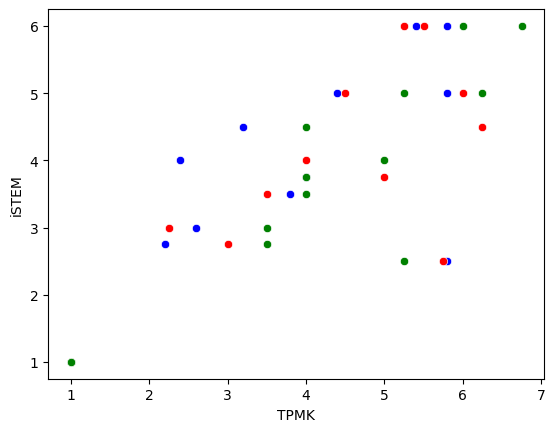

In [11]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='TPMK', y='iSTEM', color="blue", data=df)
sns.scatterplot(x='TPEK', y='iSTEM', color="red", data=df)
sns.scatterplot(x='TPSK', y='iSTEM', color="green", data=df)

In [77]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['TPMK', 'TPSK']]
Vars_Indep= df[['TPSK']]
Var_Dep= df['iSTEM']

In [78]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [79]:
# Now redefine your independent and dependent variables
Vars_Indep = df[['TPSK']]
Var_Dep = df['iSTEM']

In [80]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [81]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TPSK'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.81777108]),
 'rank_': 1,
 'singular_': array([6.18932083]),
 'intercept_': 0.20105421686747027}

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['TPEK']])
y_pred

In [74]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

ValueError: cannot insert Predicciones, already exists

<Axes: xlabel='TPSK', ylabel='iSTEM'>

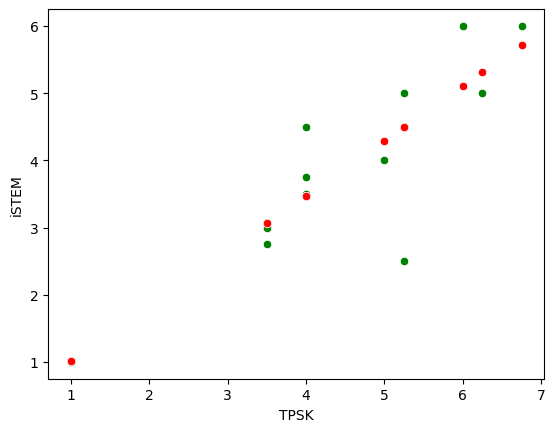

In [83]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='TPSK', y='iSTEM', color="green", data=df)
sns.scatterplot(x='TPSK', y='Predicciones', color="red", data=df)
#sns.scatterplot(x='TPEK', y='iSTEM', color="red", data=df)
#sns.scatterplot(x='TPEK', y='Predicciones', color="red", data=df)
#sns.scatterplot(x='TPMK', y='iSTEM', color="blue", data=df)
#sns.scatterplot(x='TPMK', y='Predicciones', color="red", data=df)
#sns.lineplot(x='TPSK', y='Predicciones', color="red", data=df)

In [84]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7969782209904529

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8927363670146148

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

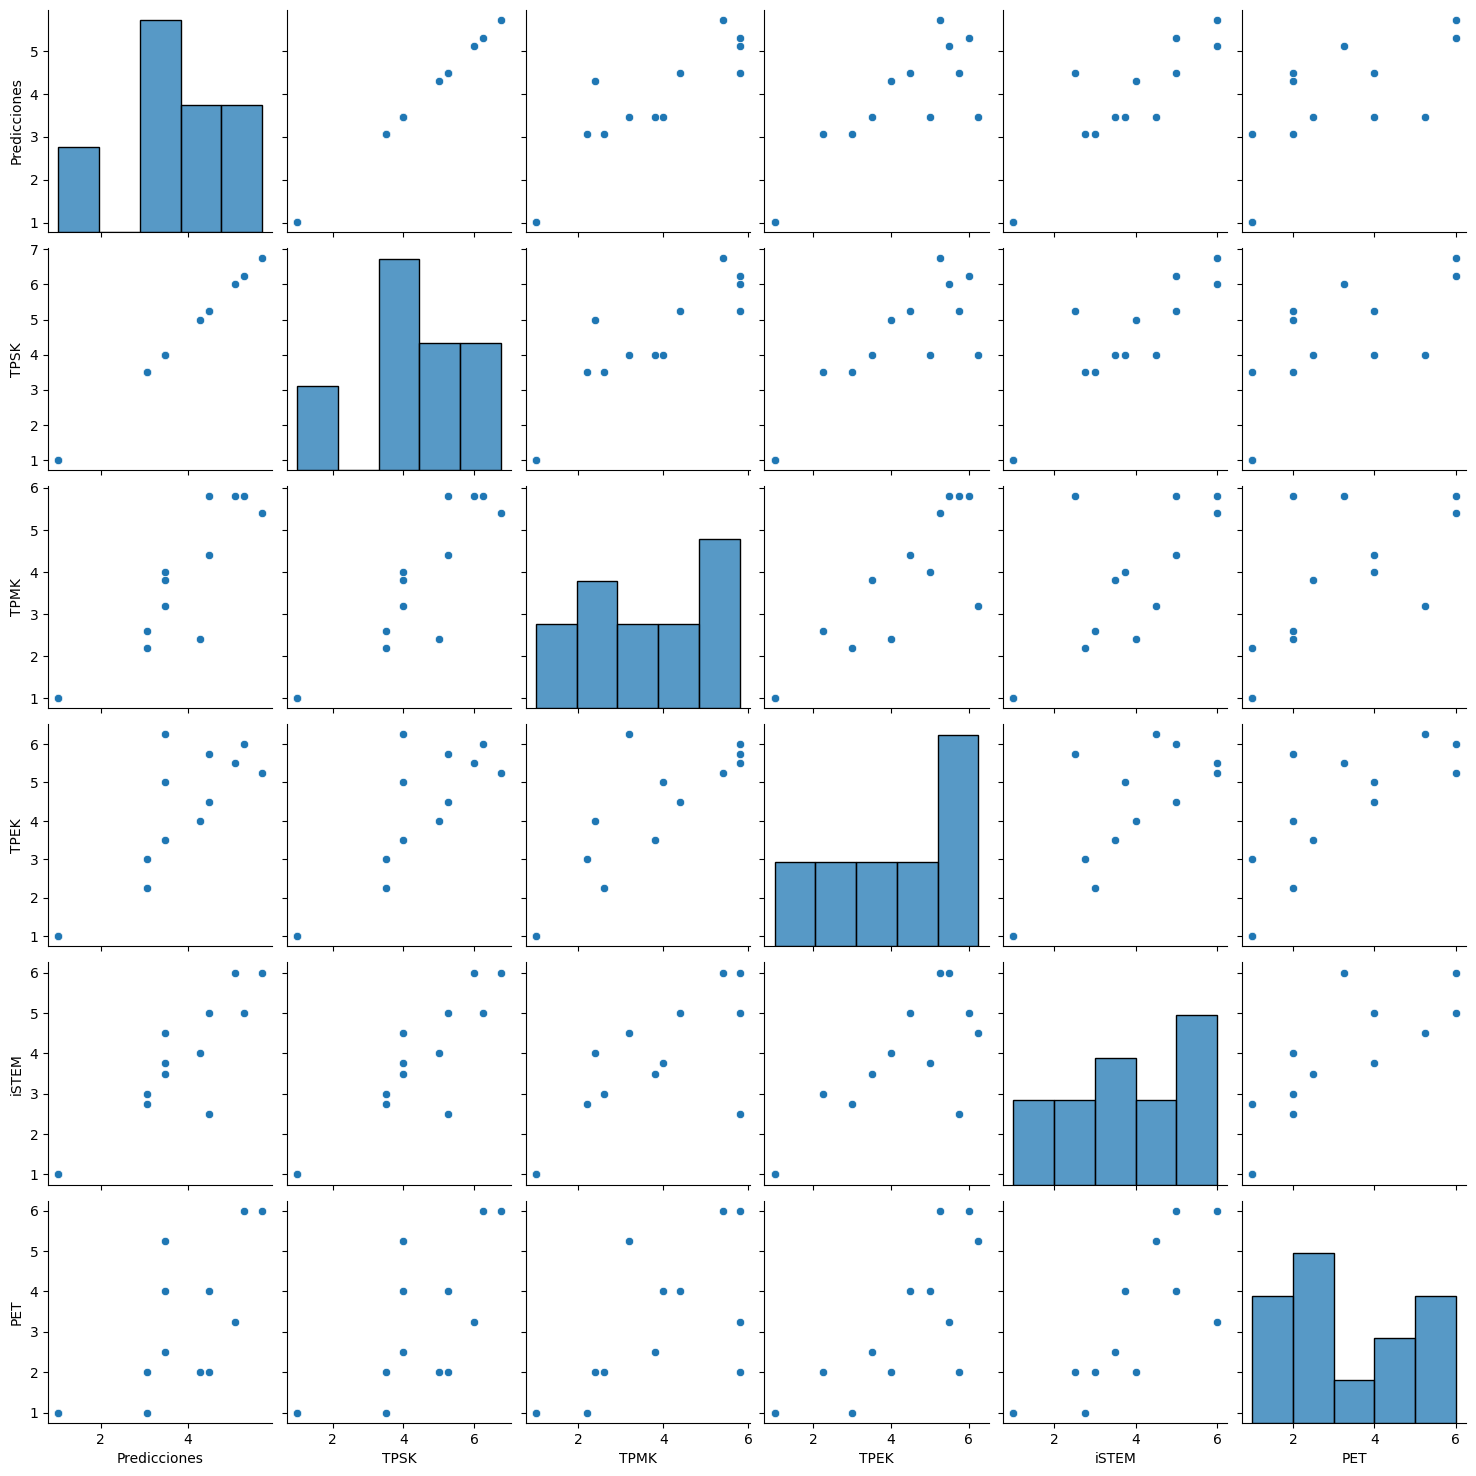

In [86]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [87]:
#Encontramos todas las correlaciones entre las variables,
#excluyendo columnas no numéricas.
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

In [88]:
#Encontramos todas las correlaciones entre las variables,
#excluyendo columnas no numéricas.
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

In [89]:
# Now calculate the correlation matrix
Corr_Factors = numeric_df.corr()
Corr_Factors

,Predicciones,TPSK,TPMK,TPEK,iSTEM,PET
Predicciones,1.000000,1.000000,0.893720,0.845461,0.892736,0.705792
TPSK,1.000000,1.000000,0.893720,0.845461,0.892736,0.705792
TPMK,0.893720,0.893720,1.000000,0.849823,0.752662,0.674018
TPEK,0.845461,0.845461,0.849823,1.000000,0.781157,0.774260
iSTEM,0.892736,0.892736,0.752662,0.781157,1.000000,0.803887
PET,0.705792,0.705792,0.674018,0.774260,0.803887,1.000000


In [90]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones,TPSK,TPMK,TPEK,iSTEM,PET
Predicciones,1.000000,1.000000,0.893720,0.845461,0.892736,0.705792
TPSK,1.000000,1.000000,0.893720,0.845461,0.892736,0.705792
TPMK,0.893720,0.893720,1.000000,0.849823,0.752662,0.674018
TPEK,0.845461,0.845461,0.849823,1.000000,0.781157,0.774260
iSTEM,0.892736,0.892736,0.752662,0.781157,1.000000,0.803887
PET,0.705792,0.705792,0.674018,0.774260,0.803887,1.000000


In [92]:
# Exclude 'Predicciones' column
heatmap_df = df.drop(columns=['Predicciones'])

In [93]:
# Select only numeric columns for correlation calculation
numeric_df = heatmap_df.select_dtypes(include=np.number)


In [94]:
# Now calculate the correlation matrix
Corr_Factors = numeric_df.corr()
Corr_Factors

,TPSK,TPMK,TPEK,iSTEM,PET
TPSK,1.000000,0.893720,0.845461,0.892736,0.705792
TPMK,0.893720,1.000000,0.849823,0.752662,0.674018
TPEK,0.845461,0.849823,1.000000,0.781157,0.774260
iSTEM,0.892736,0.752662,0.781157,1.000000,0.803887
PET,0.705792,0.674018,0.774260,0.803887,1.000000


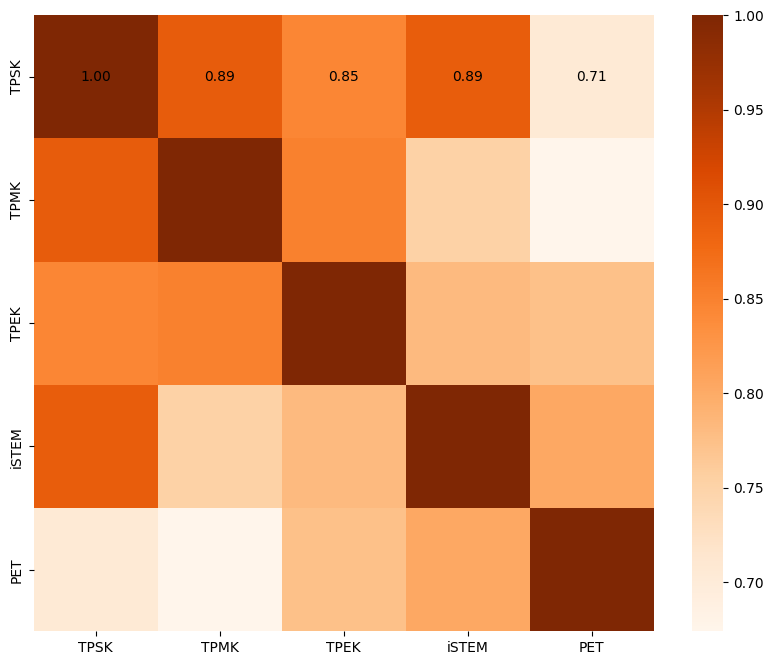

<Axes: >

In [102]:
#Ajustamos el mapa de calor de los coeficientes de correlación
plt.figure(figsize=(10, 8))  # Adjust the values as needed
Heat_Map = sns.heatmap(Corr_Factors, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"color": "black"})  # Or any contrasting color
plt.show()
Heat_Map